In [6]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as ac
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
rd = pd.read_csv("D:/DS Files/DS Assingments/Excel Data Sheets/Universities.csv")

In [8]:
rd.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [16]:
#user built  standization function  = (x-min)/(min-max) it is also known as z scores
#normalization function = (x-min)/(max-min)
def stand(x):
    temp = (x-x.min())/(x.min()-x.max())
    return temp

In [17]:
x = rd.iloc[:,1:]

In [18]:
x.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [19]:
yd = stand(x.iloc[:,1:])

In [20]:
yd

,Top10,Accept,SFRatio,Expenses,GradRate
0,-0.847222,-0.105263,-0.368421,-0.255144,-0.900000
1,-1.000000,-0.144737,-0.000000,-1.000000,-0.466667
2,-0.472222,-0.592105,-0.157895,-0.297461,-0.166667
3,-0.666667,-0.131579,-0.315789,-0.415629,-0.700000
4,-0.763889,-0.250000,-0.368421,-0.239835,-0.766667
5,-0.847222,-0.118421,-0.210526,-0.427512,-0.933333
6,-0.861111,-0.210526,-0.315789,-0.416996,-0.933333
7,-0.638889,-0.131579,-0.315789,-0.208161,-0.833333
8,-0.875000,-0.000000,-0.263158,-0.561699,-1.000000
9,-0.652778,-0.394737,-0.052632,-0.910991,-0.666667


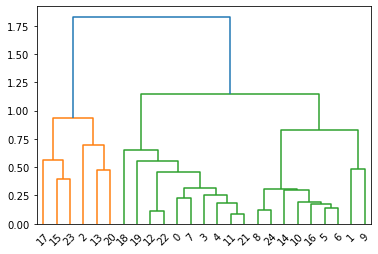

In [34]:
dend = sch.dendrogram(sch.linkage(yd , method = 'complete'))

In [26]:
hc = ac(n_clusters = 3, affinity = 'euclidean',linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [28]:
y_hc = hc.fit_predict(yd)
y_hc

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1], dtype=int64)

In [30]:
rd['h_clusterid'] = pd.Series(y_hc)
rd.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [31]:
res = rd.iloc[:,1:].groupby(rd.h_clusterid).mean()

In [33]:
res

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
h_clusterid,,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000,0
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222,1
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000,2
